# Outline

- **[1 - Problem Statement](#1)**
    - [1.1 Data Content](#1.1)
    - [1.2 Install Packages and Reading Data](#1.2)
    
### Exploratory Data Analysis

- **[2 - Univariate Visualizations](#2)**
    - [2.1 - Columns Insights](#3)
- **[3 - Bivariate Visualizations](#4)**
    - [3.1 - Bivariate Conclusion](#3)
- **[3 - EDA Conclusion](#6)**
    
### Machine Learning

- **[5 - Data Preparation for ML](#7)**
- **[6 - Apply Machine Learning Algorithms](#8)**
- **[7 - Best Model](#9)**


<br>

---

<br>


<a name ="1"></a>
## Problem Statement

### Context
- Identify customer satisfaction is a key element for modern businesses as it can significantly contribute to a continuing effort of service quality improvement. In order to meet customer expectations and achieve higher quality levels, airlines needs to develop a specific mechanism of passenger satisfaction measurement.

- This is a <font color = 'green'>classification</font> supervised machine learning project, Predicting Satisfaction of Airline Passengers.

- This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

<br>

### Datatset
- This dataset is obtained from Kaggle: [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

<a name ="1.1"></a>
<br>
<br>

<details>
    <summary><font size="3"><b>Attributes (Click to expand)</b></font></summary>


<br>

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival
    
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

<br>

---

<a name = "1.2"></a>
## Packages

In [5]:
import pandas as pd,numpy as np,seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import iqr

matplotlib and seaborn for visualizing the data, Pandas and Numpy for manipulation process.

In [6]:
data = pd.read_csv("../Data/airline_passenger_satisfaction.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### Missing Values

There is one column with missing values we identify it from his type (float) which indicates to either float answers or **nan** Values.

In [8]:
data.drop(columns=['ID'],inplace=True)

Id column is useless in both process (EDA - ML).

<a name ='2'></a>

## Univariate Exploration

#### Styling Matplotlib and Seaborn

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\Logo\AppData\Local\Temp\ipykernel_16728\2810106999.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


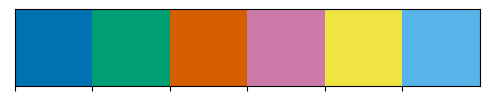

In [10]:
plt.style.use("seaborn-colorblind")
sns.palplot(sns.color_palette())
colorr ='#2293b5'
plt.show()

---

- Getting categorical data columns to be easy to automate processes for them later.

In [11]:
categorical_data = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_data

['Gender', 'Satisfaction', 'Type of Travel', 'Class', 'Customer Type']

In [12]:
for i in categorical_data:
    print(i)
    print(data[i].unique())
    print('--'*20)

Gender
['Male' 'Female']
----------------------------------------
Satisfaction
['Neutral or Dissatisfied' 'Satisfied']
----------------------------------------
Type of Travel
['Business' 'Personal']
----------------------------------------
Class
['Business' 'Economy' 'Economy Plus']
----------------------------------------
Customer Type
['First-time' 'Returning']
----------------------------------------


- It's look like that categorical data is clean

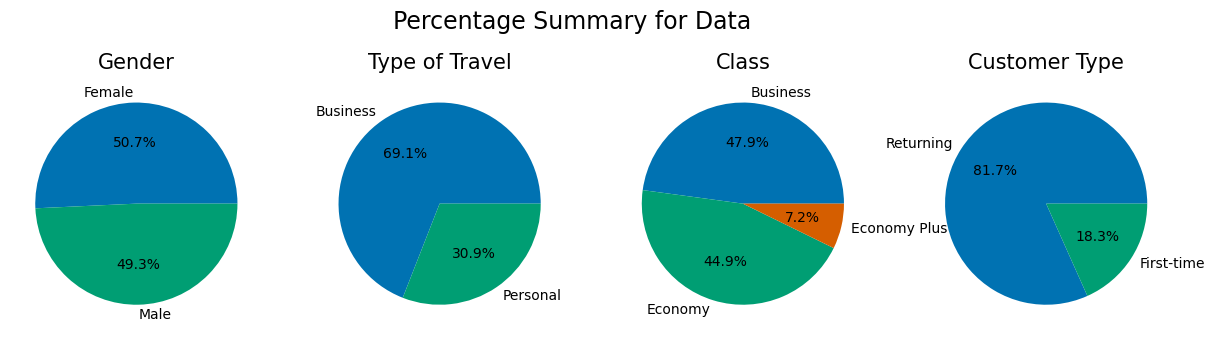

In [13]:
c = categorical_data.copy()
c.remove('Satisfaction')

fig,ax = plt.subplots(1,len(c),figsize=(15,4))
for ind,i in enumerate(c):
    d = data[i].value_counts()
    ax[ind].pie(d,autopct = '%1.1f%%',labels=d.index)
    ax[ind].set_title(i,size=15)
fig.suptitle("Percentage Summary for Data",size=17)
plt.show()

- Most customers are <font color='#2088a8'>Returning Passengers</font>, so they have experienced the services before.
- Most percentage of people were in <font color='#2088a8'>Business Class</font> and the percentage of passengers in Economy Plus is relatively small.
- Gender seemed to be <font color='#2088a8'>equal</font> in data.
- The Most common Type of Travel is <font color ='#2088a8'>Business</font>

---

Let's examine the numerical columns, namely Age, Flight Distance, Departure Delay, and Arrival Delay.

In [14]:
data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


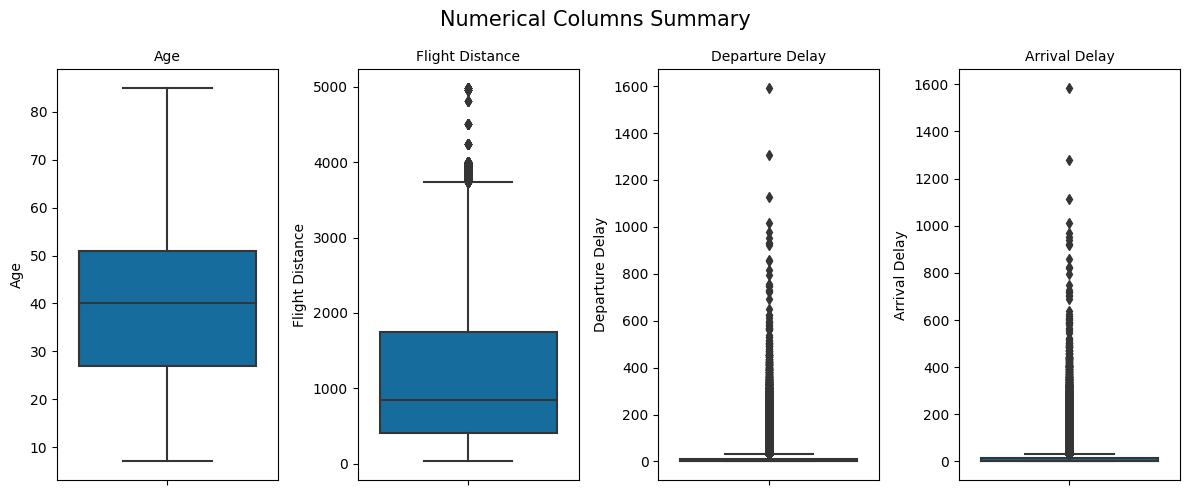

In [15]:
numerical_columns=data.describe().columns[:4]

fig,axes = plt.subplots(1,len(numerical_columns),figsize=(12,5))
for ind,col in enumerate(numerical_columns):
    sns.boxplot(data=data,ax=axes[ind],y=col)
    axes[ind].set_title(col,size=10)
    
fig.suptitle("Numerical Columns Summary",size=15)
fig.tight_layout()
plt.show()

There are a lot of <font color='#4287f5'>outliers</font> in the columns Flight Distance, Departure Delay, and Arrival Delay.
Outliers were detected using the interquartile range:

$$
\text{max_thresh} = Q3 + IQR*1.5\\
\text{min_thresh} = Q1 - IQR*1.5
$$
- I may specify Q3 as I want to be representing 95% of data instead of 75%

---

We should deal with missing values in the Arrival Delay column before revisiting the outliers problem.

In [16]:
data.loc[:,numerical_columns].head()

,Age,Flight Distance,Departure Delay,Arrival Delay
0,48,821,2,5.0
1,35,821,26,39.0
2,41,853,0,0.0
3,50,1905,0,0.0
4,49,3470,0,1.0


In [17]:
data.isna().sum()[data.isna().sum()!=0]/data.shape[0]*100

Arrival Delay    0.302587
dtype: float64

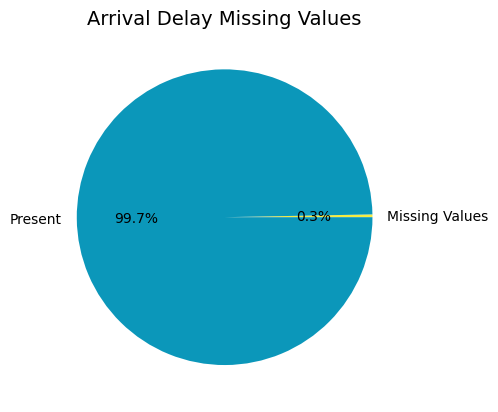

In [18]:
isnull = data['Arrival Delay'].isnull().sum()/data.shape[0]*100

plt.pie([isnull,100-isnull],labels=['Missing Values','Present'],autopct='%1.1f%%',colors =['#f5ec42','#0b97ba'])
plt.title("Arrival Delay Missing Values",size=14)
plt.show()

Since the number of missing values is relatively small compared to the data, I have decided to drop them.

In [19]:
data.dropna(axis=0,subset=['Arrival Delay'],inplace=True)
data['Arrival Delay'] = data['Arrival Delay'].astype('int64')

---

>Returning to Outlires

In [20]:
print("Outlires Percentages in Numerical columns: \n")

liss = []
for col in numerical_columns:
    maxi = (1.5*iqr(data[col]))+np.quantile(data[col],.95 if col !='Flight Distance' else .85)
    outlires = data[data[col]>maxi]
    print(col.capitalize()+' '+str(outlires.shape[0]/data.shape[0]*100)[:10]+' %')


Outlires Percentages in Numerical columns: 

Age 0.0 %
Flight distance 0.04247530 %
Departure delay 3.56251978 %
Arrival delay 3.58414358 %


In [21]:
maxdict = {}
for col in numerical_columns:
    maxdict[col]=(1.5*iqr(data[col]))+np.quantile(data[col],.95 if col !='Flight Distance' else .85)
maxdict

{'Age': 100.0,
 'Flight Distance': 4414.0,
 'Departure Delay': 95.0,
 'Arrival Delay': 97.5}

In [22]:
outlires = data[(data['Flight Distance']>maxdict['Flight Distance'] )| (data['Departure Delay']>maxdict['Departure Delay']) | (data['Arrival Delay']>maxdict['Arrival Delay'])]
print(str(outlires.shape[0]/data.shape[0]*100)[:4]+'%')

4.03%


>Only <font color='#4287f5'>4%</font> of the data I decided to let them, under the assumption that they are special cases.

In [23]:
data.drop(outlires.index,axis=0,inplace=True)

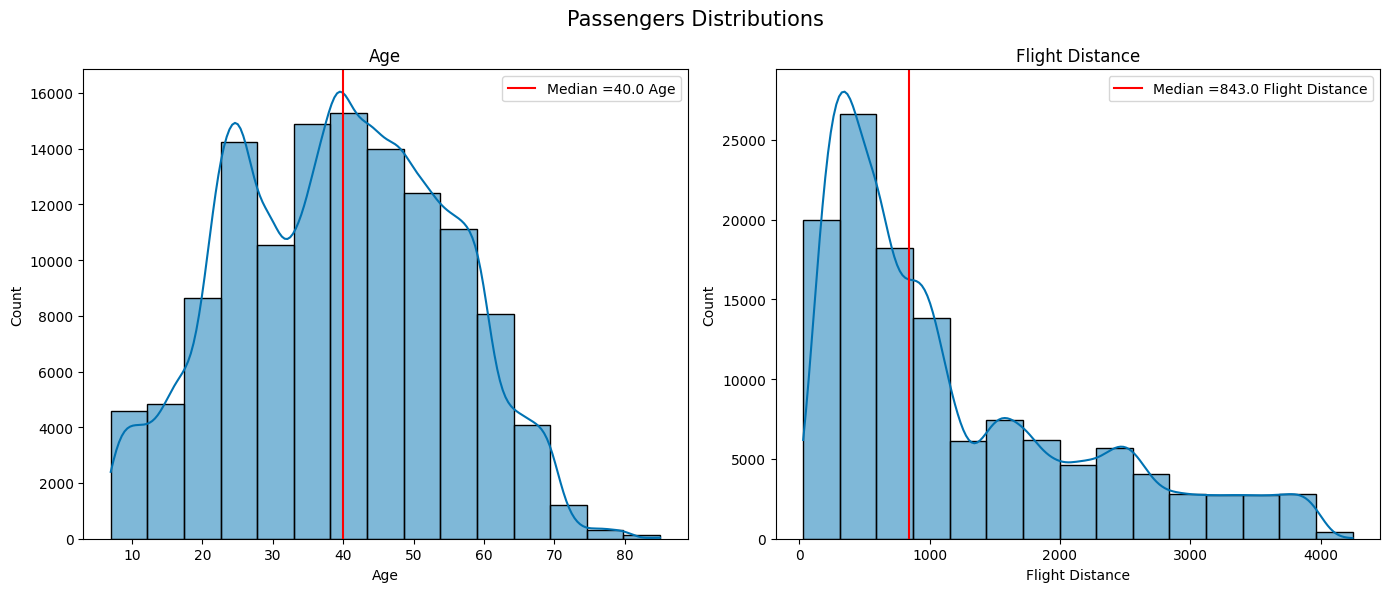

In [24]:
fig,axs = plt.subplots(1,len(numerical_columns)-2,figsize=(14,6))

for ind,col in enumerate(numerical_columns[:2]):
    sns.histplot(data=data,x=col,ax=axs[ind],kde=True,bins=15)
    axs[ind].set_title(col)
    axs[ind].set_xlabel(col)
    axs[ind].axvline(data[col].median(),label=f'Median ={data[col].median()} {col}',color='r')
    axs[ind].legend()
    
fig.suptitle("Passengers Distributions",size=15)
fig.tight_layout()
plt.show()

- we can see from Age Distribution that:
    - Age has like <font color ='#2088a8'>Normal ditribution</font>
    - Average Age in Passengers is <font color ='#2088a8'>40 </font>years old
    - <font color ='#2088a8'>Age 25</font> is present alot too.
- Flight Distance Distribution:
    - The Distribution here has <font color ='#2088a8'>left skewness</font>
    - Majority of Flights are under 1000 km

---

Moving to Time Delays in data, I created a column with total delay for each passanger to be easy to deal with time delay later.
look at [High corrlation](#corr) which allow us to do so.


In [25]:
data['Total Time Delay'] = data['Arrival Delay']+data['Departure Delay']

I will convert delays columns into categories to be easy to interpret later.

In [26]:
for col in ['Arrival Delay','Departure Delay','Total Time Delay']:
    data[str(col+'_Category')] = pd.cut(data[col],bins=[0,1,10,20,60,data[col].max()],
           labels=['<1','1-10','10-20','20-60','>60'],
          include_lowest=True)

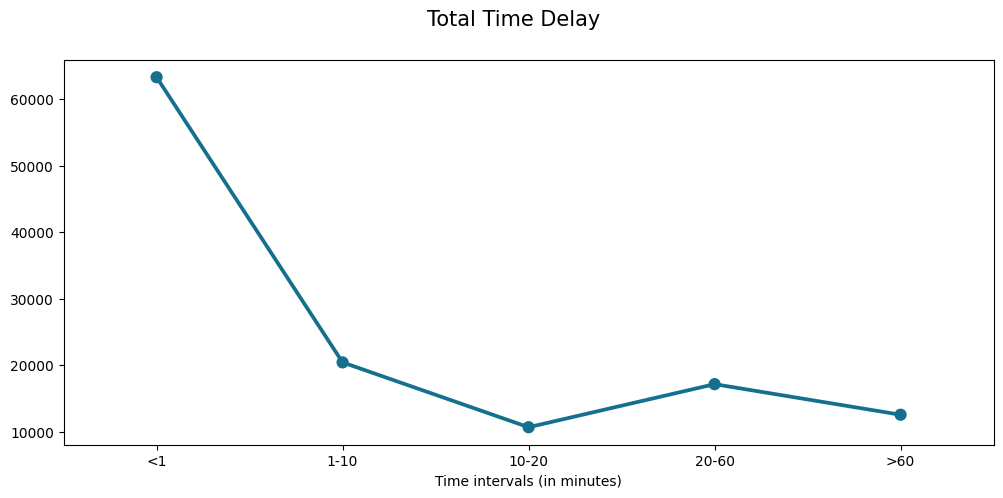

In [27]:
toplot = data['Total Time Delay_Category'].value_counts()

fig,ax = plt.subplots(1,1,figsize=(12,5))

sns.pointplot(data=data,x=toplot.index,y=toplot,color='#14708c')

ax.set_xlabel('Time intervals (in minutes)')
ax.set_ylabel('')

fig.suptitle("Total Time Delay",size=15)
plt.show()

- From this graph, we can observe the following trends:
    - Majority of Passenger with <font color ='#2088a8'>no delay</font> at all
    - Approximately <font color ='#2088a8'>16%</font> of passengers face delays between 20 minutes to 60 minutes, and half of them face delays of more than one hour.

---

Let's move into the Rating columns, from Departure and Arrival Time Convenience to Baggage Handling, and analyze them.

In [28]:
Rating_Columns = data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling'].columns.tolist()
print(Rating_Columns)

['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


<br>
I have assigned the Rating columns to a variable for easier handling later.

In [29]:
numerical_Ratings = data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling'].copy()
numerical_Ratings = numerical_Ratings.apply(lambda col : col.replace(0,col.mode()[0]))

numerical_Ratings.describe()

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000
mean,3.265138,2.890126,3.309689,3.353444,2.975414,3.389900,3.447883,3.365113,3.288331,3.212957,3.654595,2.791928,3.363850,3.631804
std,1.361477,1.271898,1.263524,1.252885,1.279056,1.285336,1.318117,1.300323,1.312525,1.327320,1.172470,1.248250,1.334446,1.182671
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


I have copied the Rating Services data to deal with numbers and will convert the original data into categorical as they should be.

In [30]:
for col in Rating_Columns:
    data[col] = pd.Categorical(data[col])
    data[col] = data[col].replace(0,data[col].mode()[0])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124260 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  124260 non-null  object  
 1   Age                                     124260 non-null  int64   
 2   Customer Type                           124260 non-null  object  
 3   Type of Travel                          124260 non-null  object  
 4   Class                                   124260 non-null  object  
 5   Flight Distance                         124260 non-null  int64   
 6   Departure Delay                         124260 non-null  int64   
 7   Arrival Delay                           124260 non-null  int64   
 8   Departure and Arrival Time Convenience  124260 non-null  category
 9   Ease of Online Booking                  124260 non-null  category
 10  Check-in Service                

---

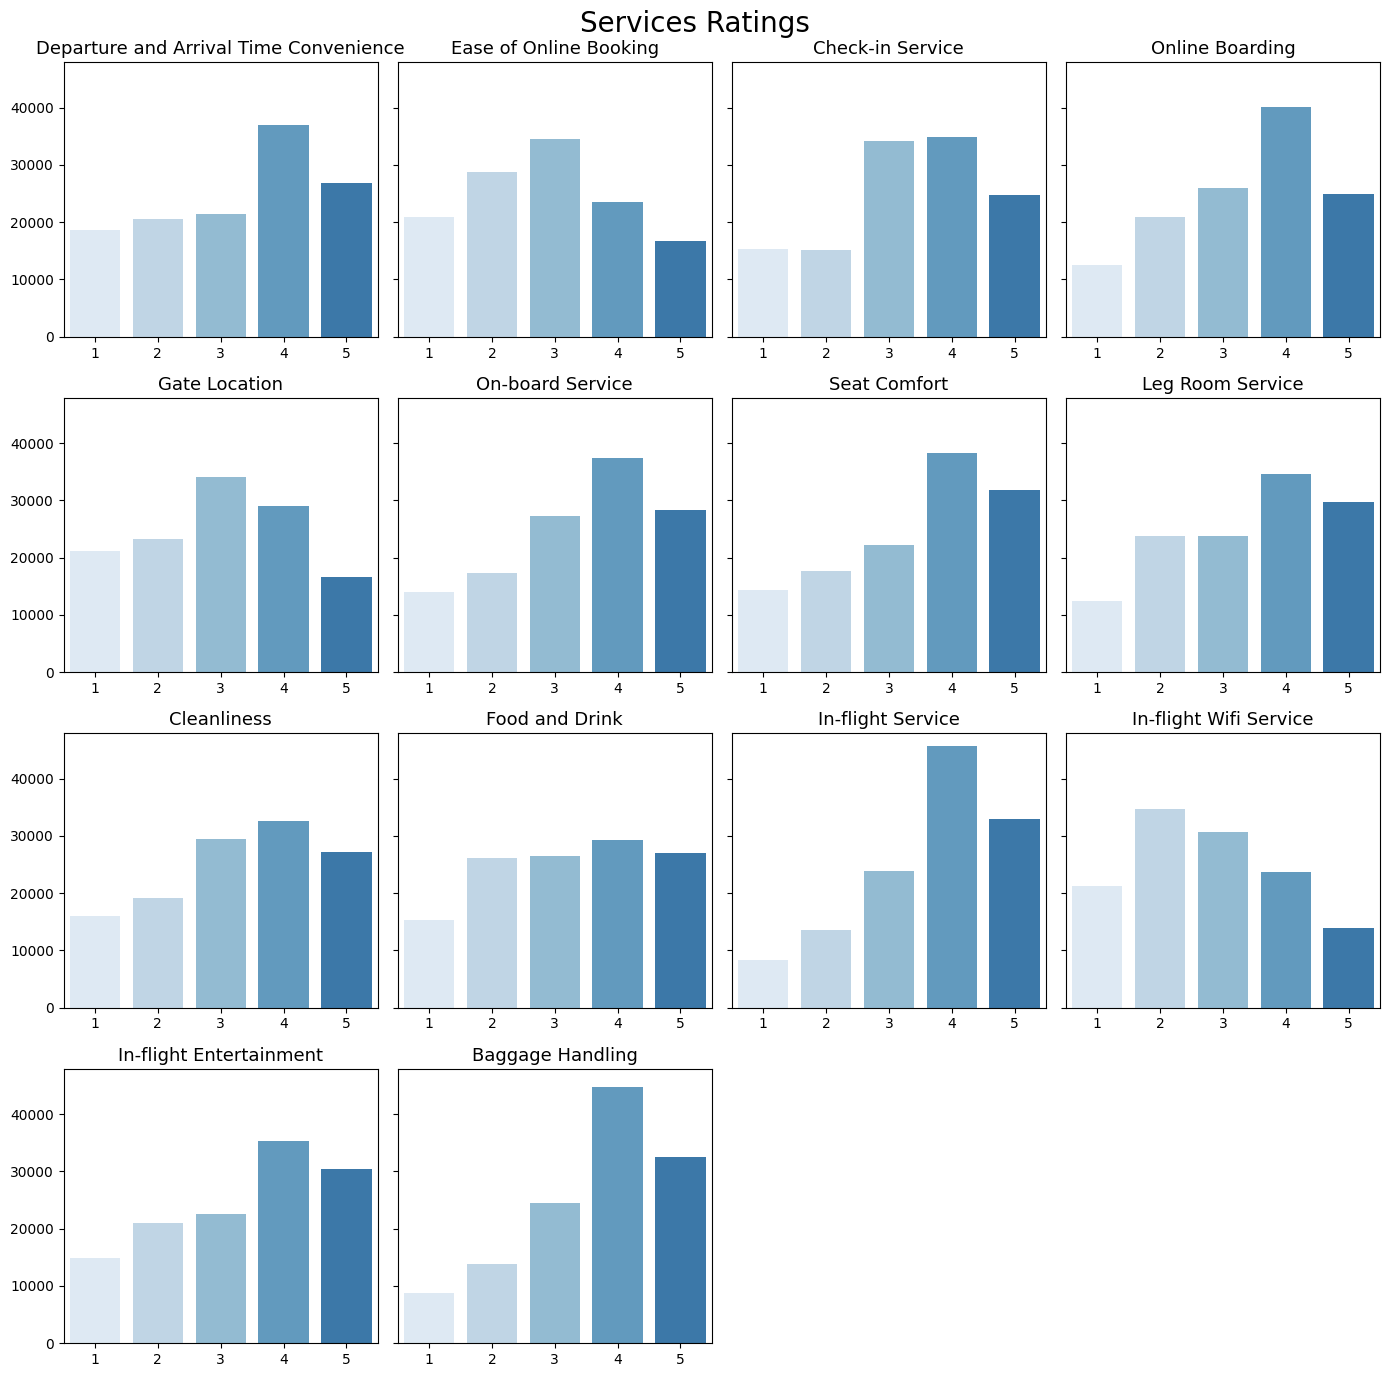

In [32]:
sns.set_palette('Blues')

fig,axes = plt.subplots(4,4,figsize=(14,14),sharey=True)
k = 0
for i in range(4):
    for j in range(4):
        sns.countplot(data=data,x=Rating_Columns[k],ax=axes[i][j])
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(Rating_Columns[k],size=13)
        k+=1
        if k>13:break
      
    
axes[3][2].axis('off')
axes[3][3].axis('off')

fig.suptitle("Services Ratings",size=20)
fig.tight_layout()
plt.show()

- We Can notice that services got good ratings are:
    - <font color= '#2293b5'>In flight service, baggage handling, Online Boarding, On Board service</font>
- services got poor rating:
    - <font color='red'>Wifi Service, Gate Location, ease of online booking</font>

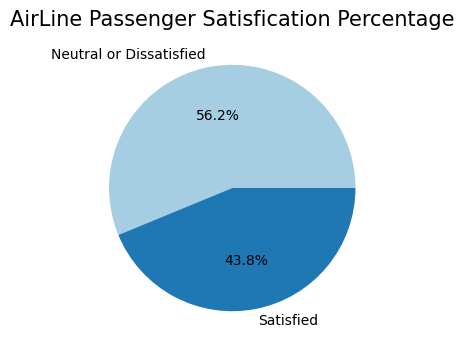

In [33]:
sns.set_palette('Paired')
fig,ax = plt.subplots(1,1,figsize=(4,4))
d = data['Satisfaction'].value_counts()
ax.pie(d,autopct = '%1.1f%%',labels=d.index)
ax.set_title('AirLine Passenger Satisfication Percentage',size=15)
plt.show()

- Majority of poeple <font color='#2088a8'>Neutral or Dissatisfied</font>

---

<a name='4'></a>

## Bivarite Analysis

In [34]:
plt.style.use('seaborn-colorblind')

C:\Users\Logo\AppData\Local\Temp\ipykernel_16728\1159425588.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


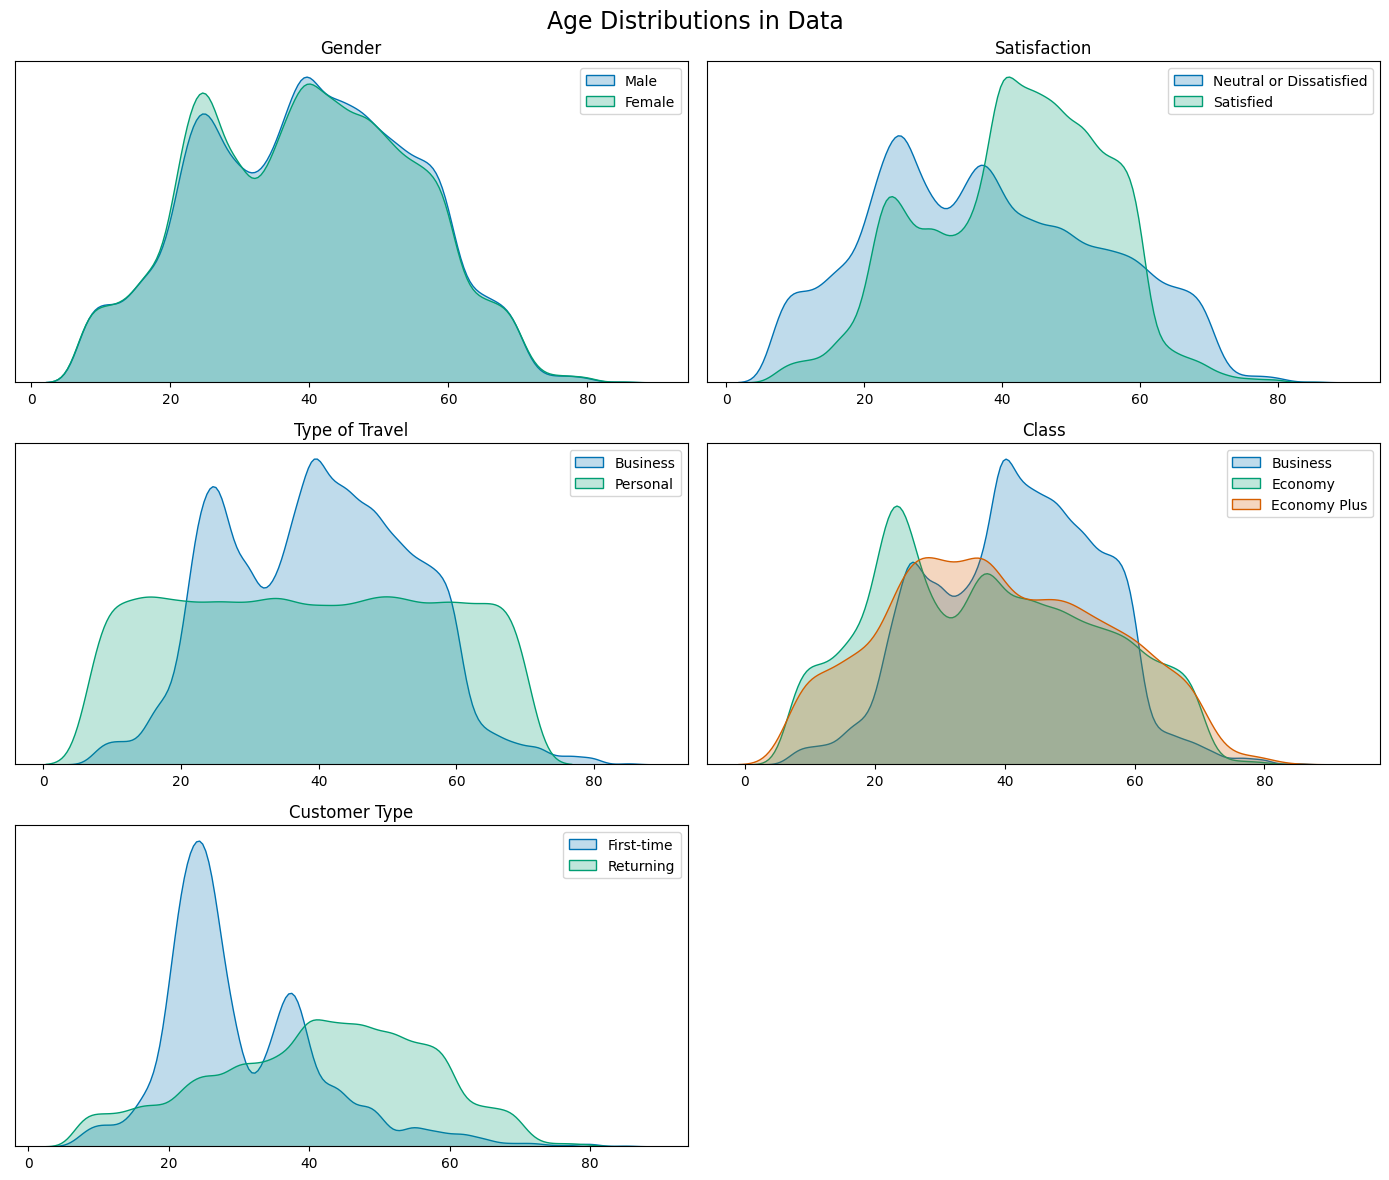

In [35]:
def automated_dist(num_col,additionalcolumns=0):
    fig = plt.figure(figsize=(14,12))
    
    cat_colmns = categorical_data.copy()
    if additionalcolumns:cat_colmns.append(additionalcolumns)

    for i,col in enumerate(cat_colmns):
        plt.subplot(3,2,i+1)
        toplot = data[col].unique().tolist()
        for ind,j in enumerate(toplot):
            g = sns.kdeplot(data = data[data[col]==j],x=num_col,label=j,fill=True)
        g.set_xlabel('')
        g.set_ylabel('')
        plt.yticks([])
        g.set_title(col)
        g.legend()

    fig.suptitle(f"{num_col} Distributions in Data",size=17)
    fig.tight_layout()
    plt.show()
    
    
automated_dist('Age')

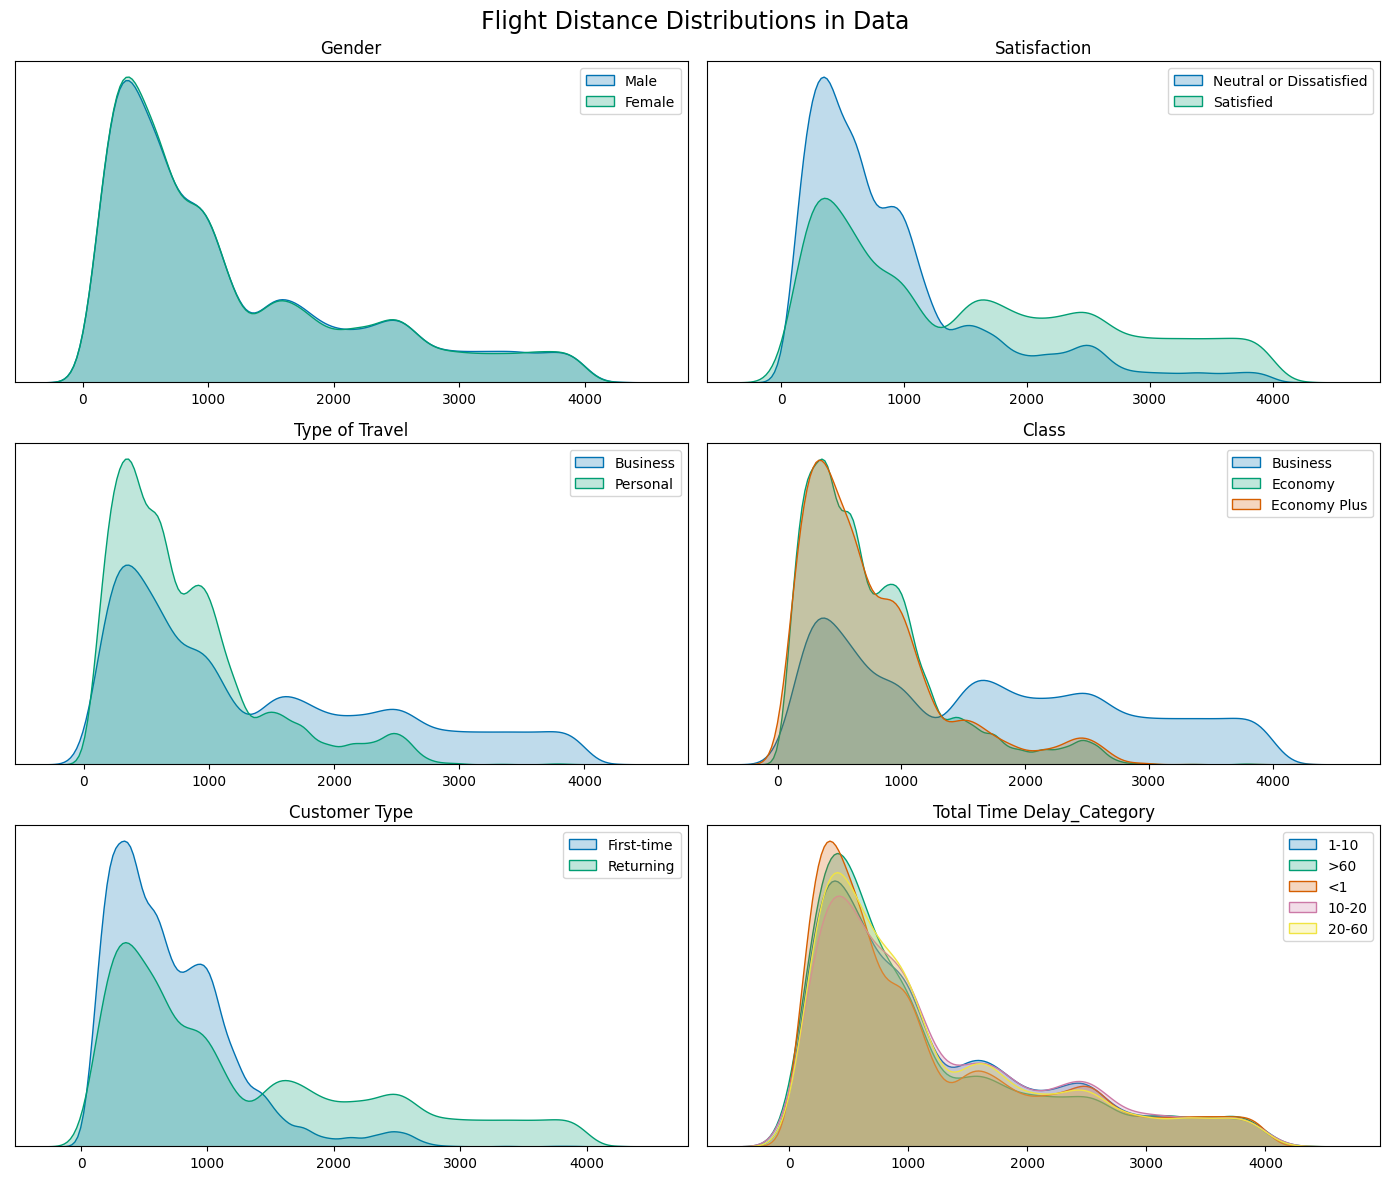

In [36]:
automated_dist('Flight Distance','Total Time Delay_Category')

In [37]:
categorical_data

['Gender', 'Satisfaction', 'Type of Travel', 'Class', 'Customer Type']

<a name='corr'></a>

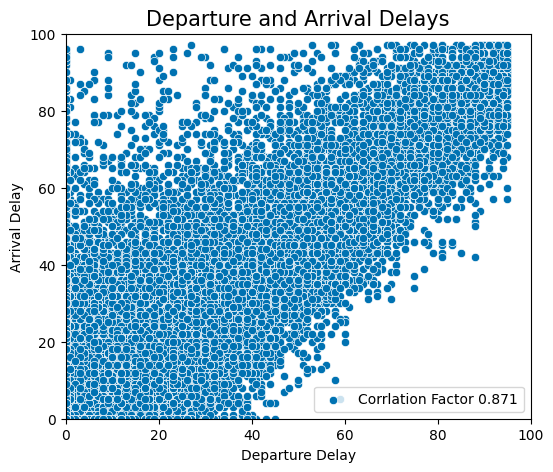

In [38]:
fig,ax = plt.subplots(figsize=(6,5))
sns.scatterplot(data=data,x='Departure Delay',y='Arrival Delay',
            ax=ax,
            label=f"Corrlation Factor {str(data['Departure Delay'].corr(data['Arrival Delay']))[:5]}"
           )

ax.set_title("Departure and Arrival Delays",size=15)
ax.set_xlim(0,100)
ax.set_ylim(0,100)

plt.legend()
plt.show()


In [39]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total Time Delay,Arrival Delay_Category,Departure Delay_Category,Total Time Delay_Category
0,Male,48,First-time,Business,Business,821,2,5,3,3,...,5,5,3,5,5,Neutral or Dissatisfied,7,1-10,1-10,1-10
1,Female,35,Returning,Business,Business,821,26,39,2,2,...,3,5,2,5,5,Satisfied,65,20-60,20-60,>60
2,Male,41,Returning,Business,Business,853,0,0,4,4,...,5,3,4,3,3,Satisfied,0,<1,<1,<1
3,Male,50,Returning,Business,Business,1905,0,0,2,2,...,4,5,2,5,5,Satisfied,0,<1,<1,<1
4,Female,49,Returning,Business,Business,3470,0,1,3,3,...,4,3,3,3,3,Satisfied,1,<1,<1,<1


In [40]:
categorical_data

['Gender', 'Satisfaction', 'Type of Travel', 'Class', 'Customer Type']

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [42]:
plt.style.use('seaborn-white')
sns.set_palette('Paired')

C:\Users\Logo\AppData\Local\Temp\ipykernel_16728\3540374295.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [43]:
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

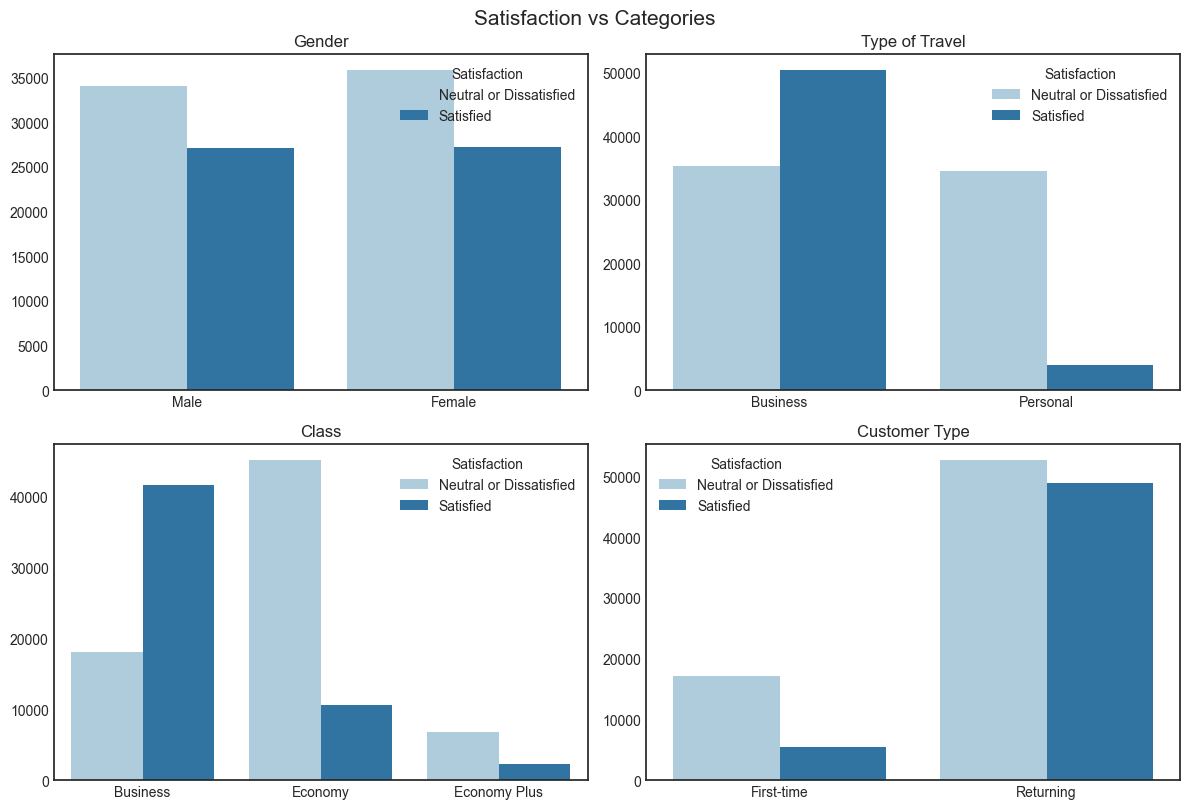

In [44]:
fig = plt.figure(figsize=(12,12))

cols = categorical_data.copy()
cols.remove('Satisfaction')

for ind,col in enumerate(cols):
    
    plt.subplot(3,2,ind+1)
    g = sns.countplot(data=data,x=col,hue='Satisfaction')
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_title(col)
    
fig.suptitle("Satisfaction vs Categories",size=15)
fig.tight_layout()
plt.show()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124260 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  124260 non-null  object  
 1   Age                                     124260 non-null  int64   
 2   Customer Type                           124260 non-null  object  
 3   Type of Travel                          124260 non-null  object  
 4   Class                                   124260 non-null  object  
 5   Flight Distance                         124260 non-null  int64   
 6   Departure Delay                         124260 non-null  int64   
 7   Arrival Delay                           124260 non-null  int64   
 8   Departure and Arrival Time Convenience  124260 non-null  category
 9   Ease of Online Booking                  124260 non-null  category
 10  Check-in Service                

In [46]:
def services_for_each(optional_col = ''):
    
    new = pd.DataFrame()
    new['Service'] = Rating_Columns
    
    if optional_col!='':
        
        for cat in data[optional_col].value_counts().index.tolist():
            lis = []
            for service in new['Service']:
                lis.append(numerical_Ratings[data[optional_col]==cat][service].mean())
            new[cat] = lis
    else:
        lis = []
        for col in Rating_Columns:
            lis.append(numerical_Ratings[col].mean())
        new['Rating'] = lis
    df_melted = new.melt(id_vars=['Service'], value_vars=new.columns[1:].tolist(), var_name='Groups')
    return df_melted


def service_show(col):
    fig,ax = plt.subplots(1,1,figsize=(15,5))

    created_data= services_for_each(col)
    a = sns.barplot(data=created_data,y='value',x='Service',hue='Groups',ax=ax)
    a.set_ylabel('')
    a.set_xlabel('')
    a.legend()

    fig.suptitle(f"Services Rating with {col}",size=18)
    fig.tight_layout()
    plt.xticks(rotation=25)
    plt.show()

In [47]:
sns.set_palette('Paired')

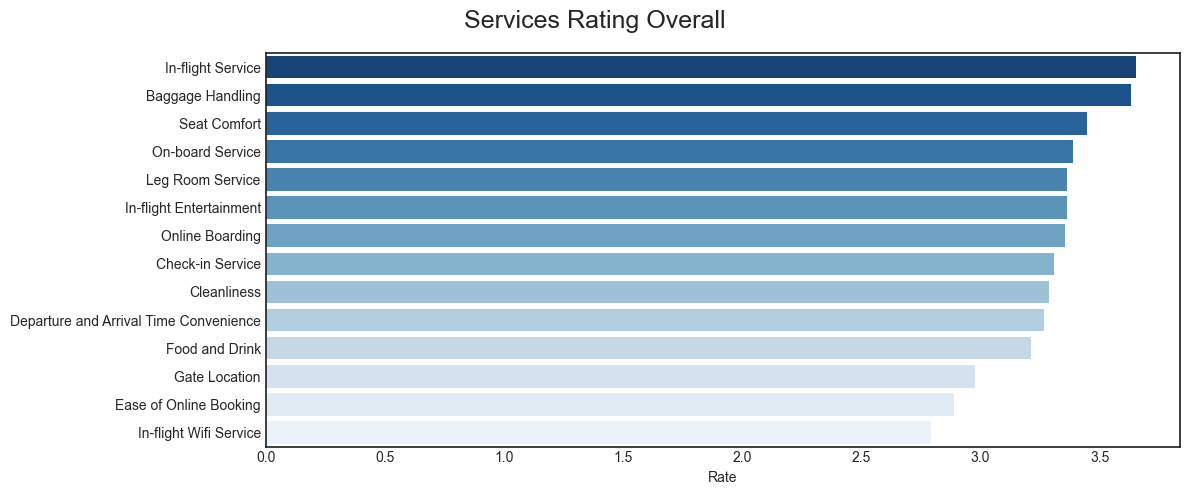

In [48]:
fig,ax = plt.subplots(1,1,figsize=(12,5))

created_data= services_for_each().sort_values(by='value',ascending=False)
a = sns.barplot(data=created_data,x='value',y='Service',ax=ax,palette='Blues_r')

a.set_ylabel('')
a.set_xlabel('Rate')

fig.suptitle(f"Services Rating Overall",size=18)
fig.tight_layout()
plt.show()

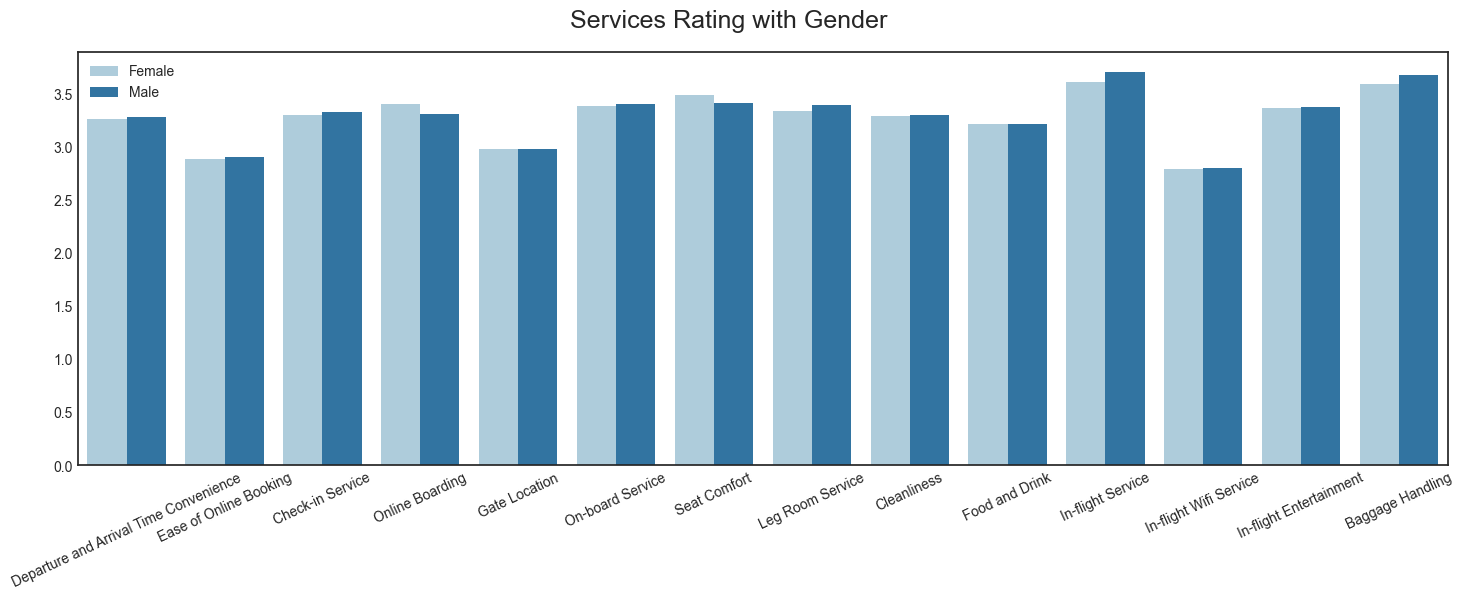

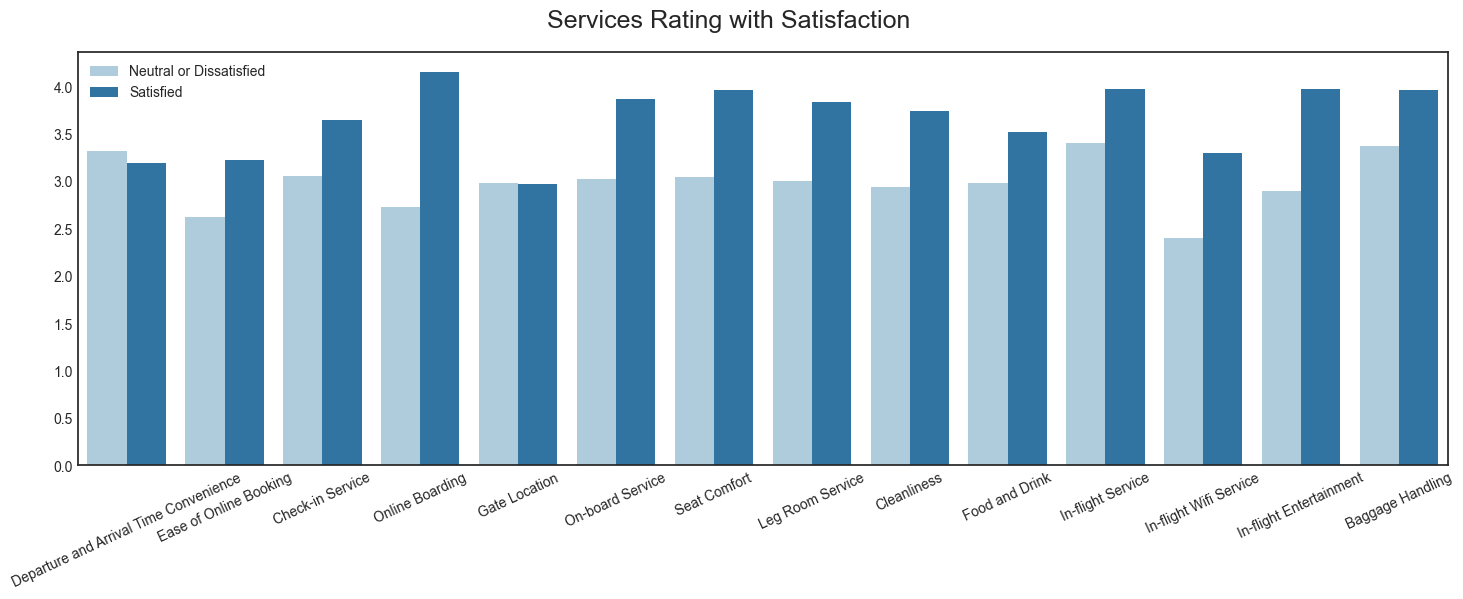

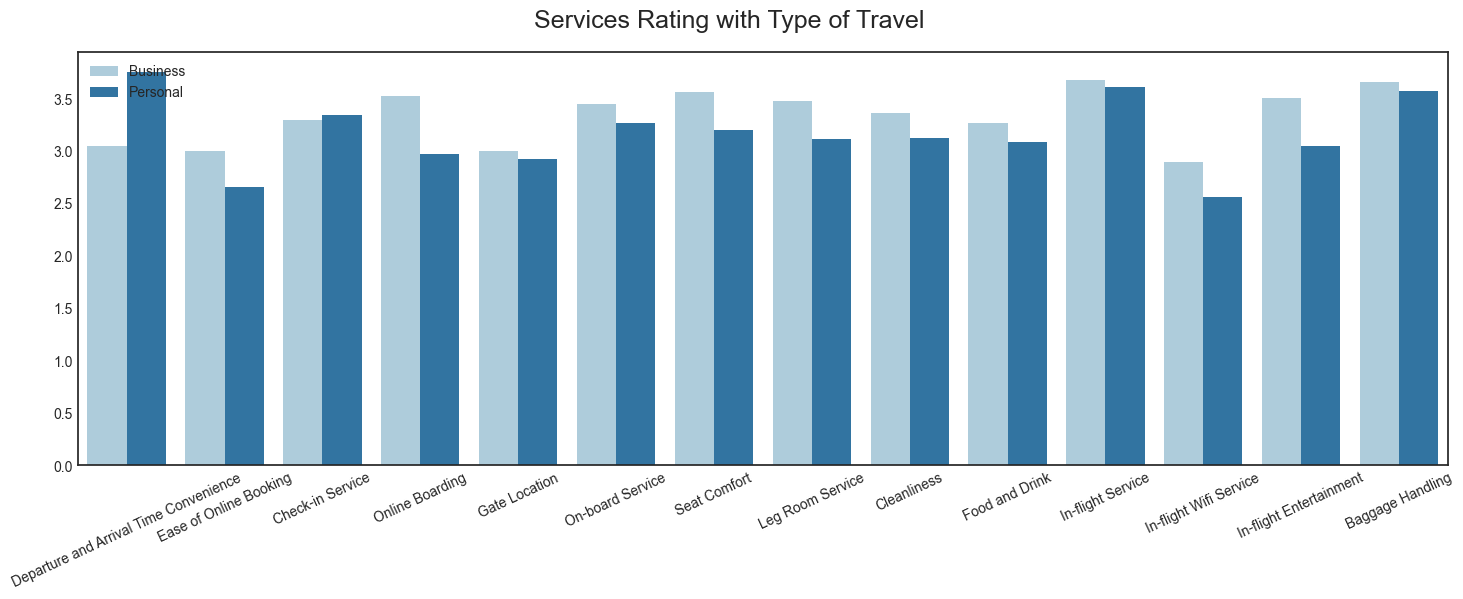

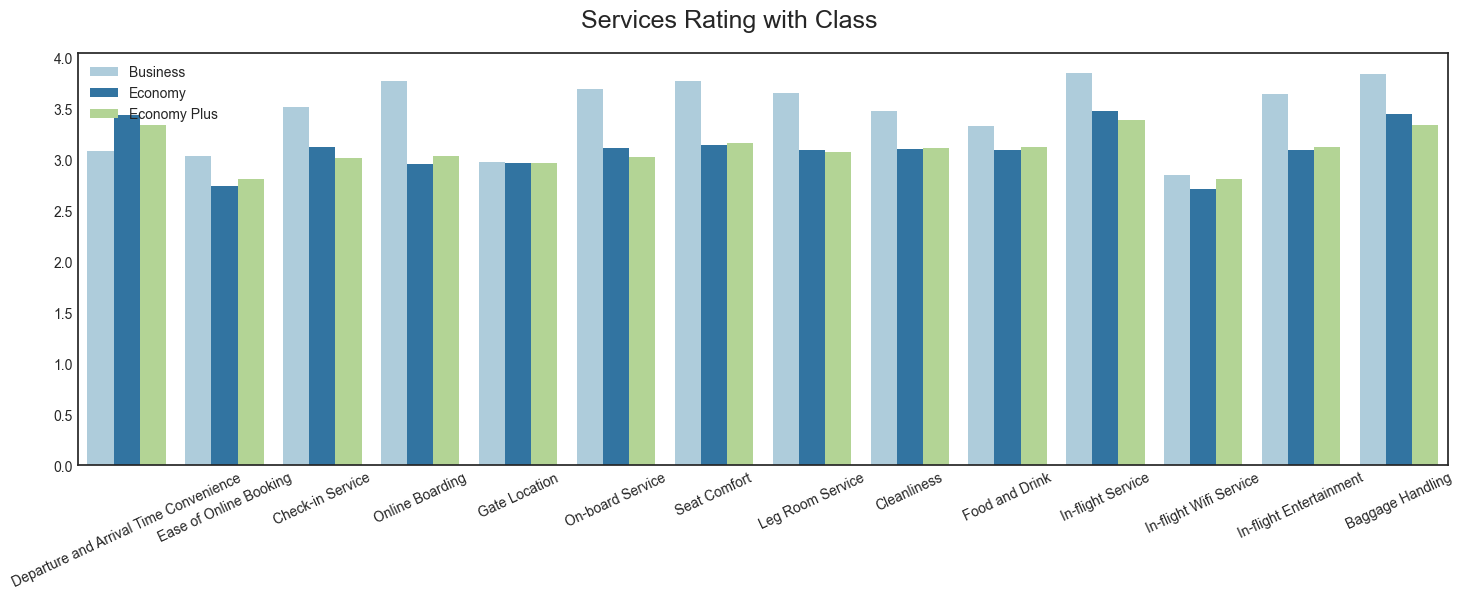

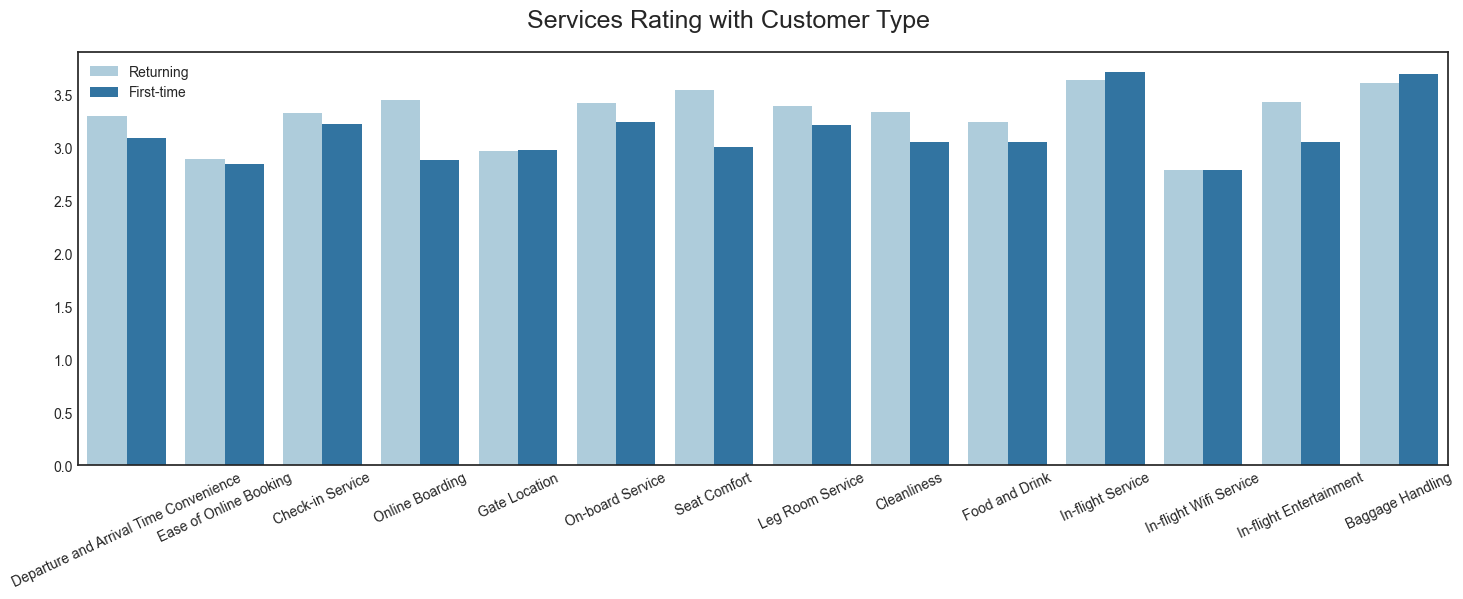

In [49]:
for f in categorical_data:
    service_show(f)

In [50]:
plt.style.use('seaborn-white')
sns.set_palette('colorblind')

C:\Users\Logo\AppData\Local\Temp\ipykernel_16728\1645489364.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


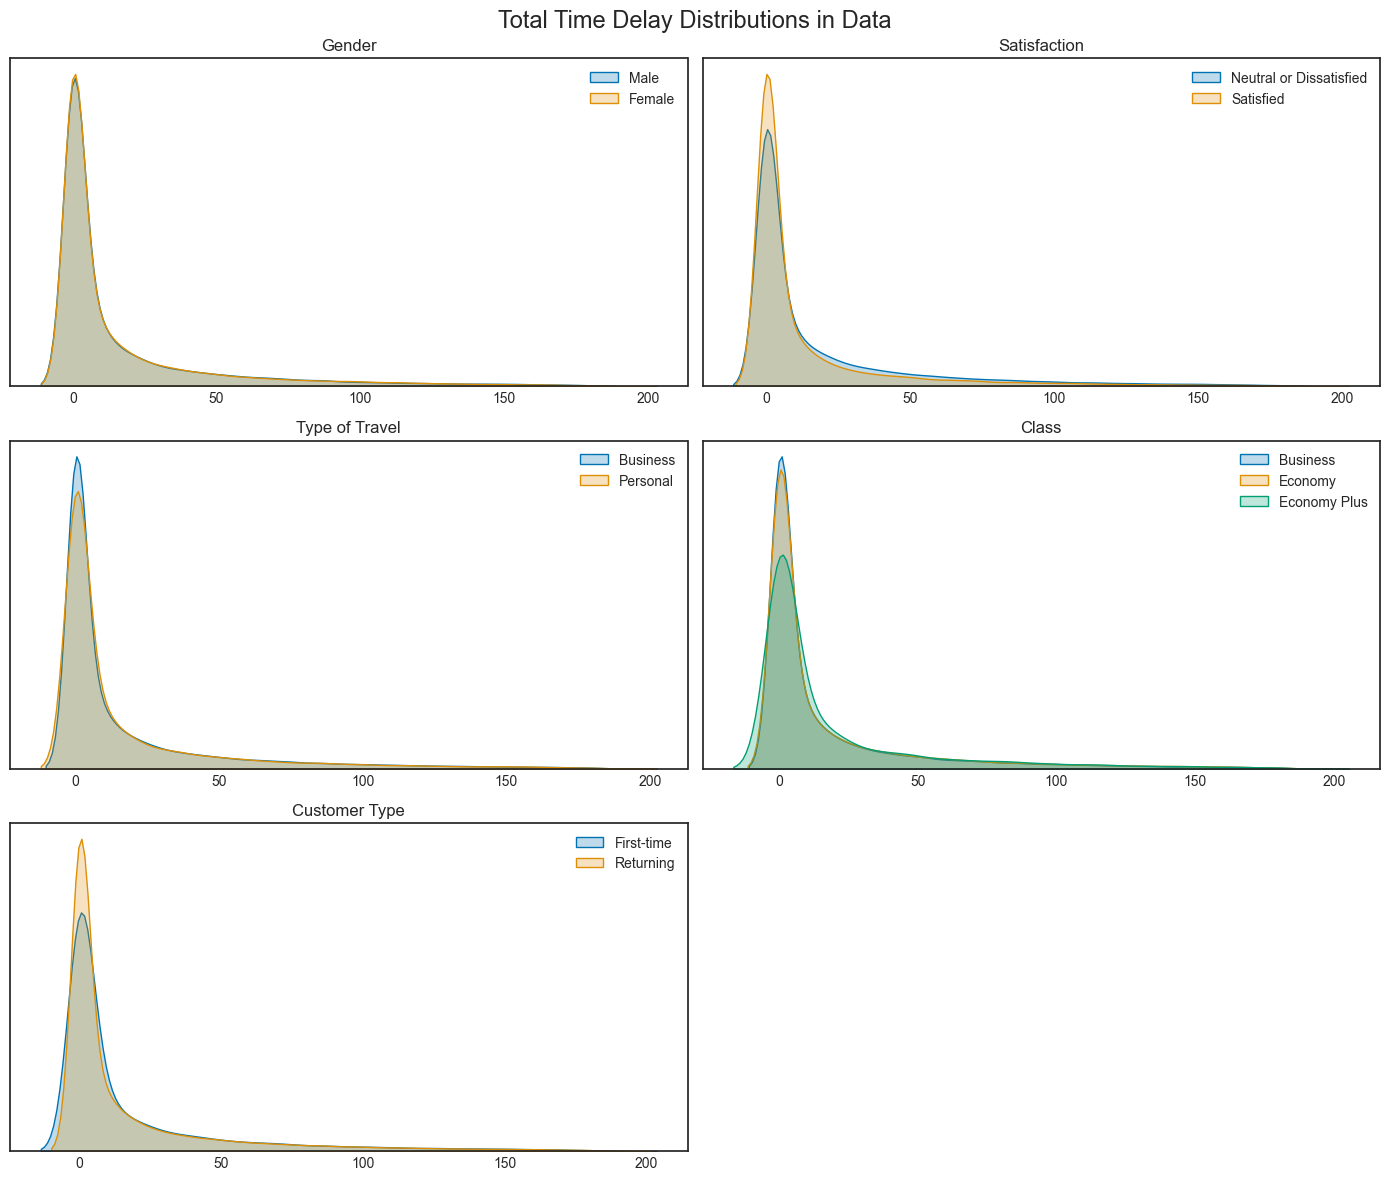

In [51]:
automated_dist('Total Time Delay')

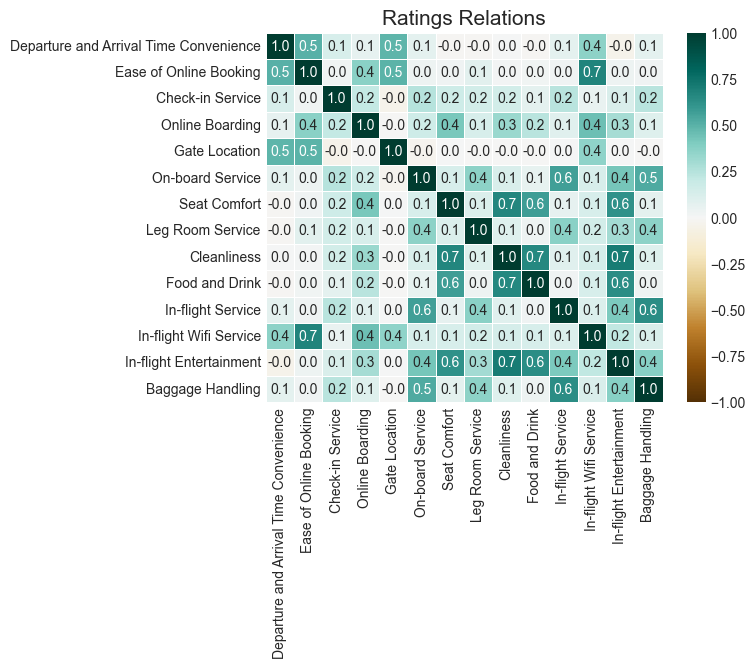

In [53]:
sns.heatmap(numerical_Ratings.corr(),cmap='BrBG',center=0,vmin=-1,vmax=1,annot=True,fmt='.1f',linewidth=.5)
plt.title("Ratings Relations",size=15)
plt.show()

In [54]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total Time Delay,Arrival Delay_Category,Departure Delay_Category,Total Time Delay_Category
0,Male,48,First-time,Business,Business,821,2,5,3,3,...,5,5,3,5,5,Neutral or Dissatisfied,7,1-10,1-10,1-10
1,Female,35,Returning,Business,Business,821,26,39,2,2,...,3,5,2,5,5,Satisfied,65,20-60,20-60,>60
2,Male,41,Returning,Business,Business,853,0,0,4,4,...,5,3,4,3,3,Satisfied,0,<1,<1,<1
3,Male,50,Returning,Business,Business,1905,0,0,2,2,...,4,5,2,5,5,Satisfied,0,<1,<1,<1
4,Female,49,Returning,Business,Business,3470,0,1,3,3,...,4,3,3,3,3,Satisfied,1,<1,<1,<1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124260 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  124260 non-null  object  
 1   Age                                     124260 non-null  int64   
 2   Customer Type                           124260 non-null  object  
 3   Type of Travel                          124260 non-null  object  
 4   Class                                   124260 non-null  object  
 5   Flight Distance                         124260 non-null  int64   
 6   Departure Delay                         124260 non-null  int64   
 7   Arrival Delay                           124260 non-null  int64   
 8   Departure and Arrival Time Convenience  124260 non-null  category
 9   Ease of Online Booking                  124260 non-null  category
 10  Check-in Service                